<a href="https://colab.research.google.com/github/MLTribe/LinearOptimization/blob/main/Programming_Practice_LO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%sql


In [24]:
!pip install numpy


zsh:1: command not found: pip


In [25]:
import numpy as np

In [26]:
import numpy as np
A = np.array([
    [1 , -2,3],
    [4, 0,-1],
    [2,1,5]

], dtype=float)

In [27]:
forbenius_norm= np.linalg.norm(A,'fro')

one_norm = np.linalg.norm(A,1)

infinity_norm = np.linalg.norm(A,np.inf)

two_norm = np.linalg.norm(A,2)
rank = np.linalg.matrix_rank(A)

left_inequality= two_norm <= forbenius_norm
right_inequlity = forbenius_norm <= np.sqrt(rank) * two_norm


print("Matrix A:", A)
print("Frobenius Norm:", forbenius_norm)
print("1-Norm:", one_norm)
print("Infinity Norm:", infinity_norm)
print("2-Norm:", two_norm)
print("Rank:" ,rank)
print("Left Inequality (2-norm <= Frobenius norm):", left_inequality)
print("Right Inequality (Frobenius norm <= sqrt(rank) * 2-norm):", right_inequlity)


Matrix A: [[ 1. -2.  3.]
 [ 4.  0. -1.]
 [ 2.  1.  5.]]
Frobenius Norm: 7.810249675906654
1-Norm: 9.0
Infinity Norm: 8.0
2-Norm: 6.278949058299141
Rank: 3
Left Inequality (2-norm <= Frobenius norm): True
Right Inequality (Frobenius norm <= sqrt(rank) * 2-norm): True


In [28]:
print('============')

In [29]:
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Question 2: Open and Closed Balls in Different Metrics on R^2

# Define the three distance metrics
def d1(x, y):
    """L1 norm (Manhattan distance): d1(x,y) = |x1-y1| + |x2-y2|"""
    return np.abs(x[0] - y[0]) + np.abs(x[1] - y[1])

def d2(x, y):
    """L2 norm (Euclidean distance): d2(x,y) = sqrt((x1-y1)^2 + (x2-y2)^2)"""
    return np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2)

def dinf(x, y):
    """L-infinity norm (Chebyshev distance): d_inf(x,y) = max(|x1-y1|, |x2-y2|)"""
    return np.max([np.abs(x[0] - y[0]), np.abs(x[1] - y[1])])


In [31]:
# Functions to compute open and closed balls

def open_ball(x0, r, metric, grid_size=500, grid_range=(-5, 5)):
    """
    Compute the open ball B_r(x0) = {x ∈ R^2 : d(x, x0) < r}

    Parameters:
    - x0: center point (array-like)
    - r: radius
    - metric: distance function (d1, d2, or dinf)
    - grid_size: resolution of the grid
    - grid_range: tuple (min, max) for grid bounds

    Returns:
    - X, Y: meshgrid coordinates
    - ball_mask: boolean array indicating points in the open ball
    """
    grid = np.linspace(grid_range[0], grid_range[1], grid_size)
    X, Y = np.meshgrid(grid, grid)

    # Compute distances for all points in the grid
    ball_mask = np.zeros_like(X, dtype=bool)
    for i in range(grid_size):
        for j in range(grid_size):
            ball_mask[i, j] = metric([X[i, j], Y[i, j]], x0) < r

    return X, Y, ball_mask

def closed_ball(x0, r, metric, grid_size=500, grid_range=(-5, 5)):
    """
    Compute the closed ball B̄_r(x0) = {x ∈ R^2 : d(x, x0) ≤ r}

    Parameters:
    - x0: center point (array-like)
    - r: radius
    - metric: distance function (d1, d2, or dinf)
    - grid_size: resolution of the grid
    - grid_range: tuple (min, max) for grid bounds

    Returns:
    - X, Y: meshgrid coordinates
    - ball_mask: boolean array indicating points in the closed ball
    """
    grid = np.linspace(grid_range[0], grid_range[1], grid_size)
    X, Y = np.meshgrid(grid, grid)

    # Compute distances for all points in the grid
    ball_mask = np.zeros_like(X, dtype=bool)
    for i in range(grid_size):
        for j in range(grid_size):
            ball_mask[i, j] = metric([X[i, j], Y[i, j]], x0) <= r

    return X, Y, ball_mask


In [32]:
# Set parameters
x0 = np.array([1.0, 1.0])
r = 3.0

print(f"Center point x0 = {x0}")
print(f"Radius r = {r}")


Center point x0 = [1. 1.]
Radius r = 3.0


In [33]:
# Compute open balls for all three metrics
print("\nComputing open balls...")
X_d1, Y_d1, open_ball_d1 = open_ball(x0, r, d1)
X_d2, Y_d2, open_ball_d2 = open_ball(x0, r, d2)
X_dinf, Y_dinf, open_ball_dinf = open_ball(x0, r, dinf)
print("Open balls computed!")



Computing open balls...
Open balls computed!


In [34]:
# Compute closed balls for all three metrics
print("\nComputing closed balls...")
X_d1_c, Y_d1_c, closed_ball_d1 = closed_ball(x0, r, d1)
X_d2_c, Y_d2_c, closed_ball_d2 = closed_ball(x0, r, d2)
X_dinf_c, Y_dinf_c, closed_ball_dinf = closed_ball(x0, r, dinf)
print("Closed balls computed!")



Computing closed balls...
Closed balls computed!


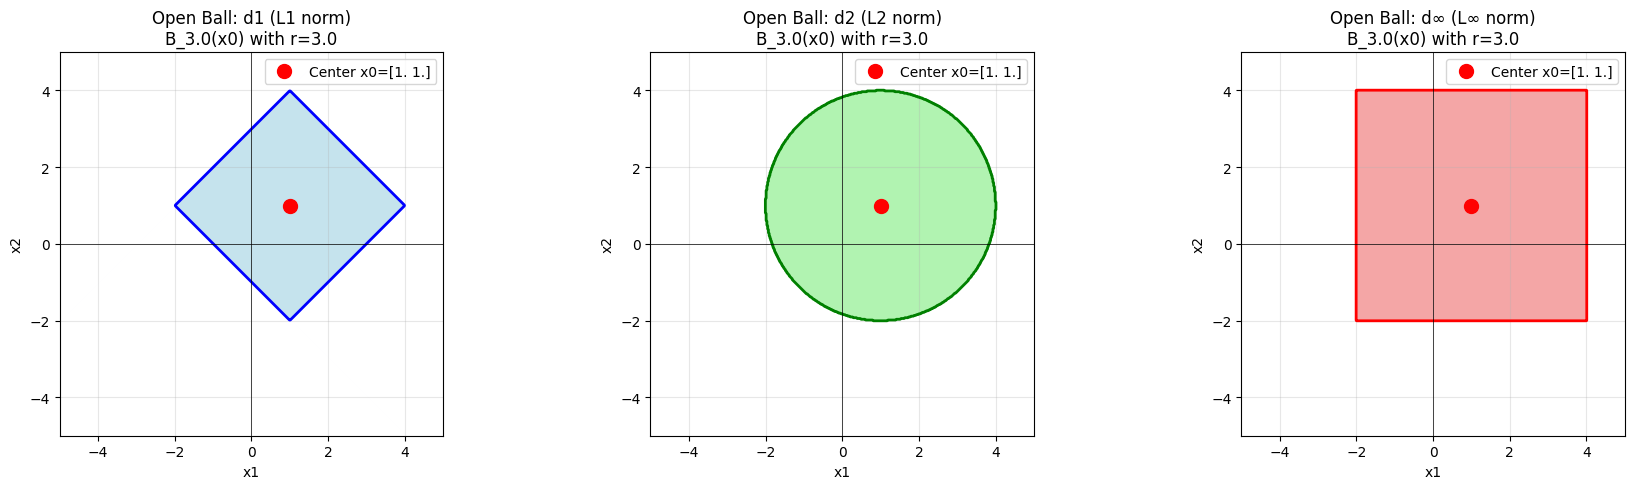

In [35]:
# Visualize OPEN balls
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Open ball with d1 (L1 norm) - Diamond shape
axes[0].contourf(X_d1, Y_d1, open_ball_d1.astype(int), levels=[0.5, 1.5], colors=['lightblue'], alpha=0.7)
axes[0].contour(X_d1, Y_d1, open_ball_d1.astype(int), levels=[0.5], colors=['blue'], linewidths=2)
axes[0].plot(x0[0], x0[1], 'ro', markersize=10, label=f'Center x0={x0}')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title(f'Open Ball: d1 (L1 norm)\nB_{r}(x0) with r={r}')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)

# Open ball with d2 (L2 norm) - Circle
axes[1].contourf(X_d2, Y_d2, open_ball_d2.astype(int), levels=[0.5, 1.5], colors=['lightgreen'], alpha=0.7)
axes[1].contour(X_d2, Y_d2, open_ball_d2.astype(int), levels=[0.5], colors=['green'], linewidths=2)
axes[1].plot(x0[0], x0[1], 'ro', markersize=10, label=f'Center x0={x0}')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].set_title(f'Open Ball: d2 (L2 norm)\nB_{r}(x0) with r={r}')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

# Open ball with d_inf (L-infinity norm) - Square
axes[2].contourf(X_dinf, Y_dinf, open_ball_dinf.astype(int), levels=[0.5, 1.5], colors=['lightcoral'], alpha=0.7)
axes[2].contour(X_dinf, Y_dinf, open_ball_dinf.astype(int), levels=[0.5], colors=['red'], linewidths=2)
axes[2].plot(x0[0], x0[1], 'ro', markersize=10, label=f'Center x0={x0}')
axes[2].set_xlabel('x1')
axes[2].set_ylabel('x2')
axes[2].set_title(f'Open Ball: d∞ (L∞ norm)\nB_{r}(x0) with r={r}')
axes[2].grid(True, alpha=0.3)
axes[2].legend()
axes[2].set_aspect('equal')
axes[2].axhline(y=0, color='k', linewidth=0.5)
axes[2].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Visualize CLOSED balls
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Closed ball with d1 (L1 norm) - Diamond shape
axes[0].contourf(X_d1_c, Y_d1_c, closed_ball_d1.astype(int), levels=[0.5, 1.5], colors=['lightblue'], alpha=0.7)
axes[0].contour(X_d1_c, Y_d1_c, closed_ball_d1.astype(int), levels=[0.5], colors=['blue'], linewidths=2)
axes[0].plot(x0[0], x0[1], 'ro', markersize=10, label=f'Center x0={x0}')
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title(f'Closed Ball: d1 (L1 norm)\nB̄_{r}(x0) with r={r}')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_aspect('equal')
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)



# Closed ball with d2 (L2 norm) - Circle
axes[1].contourf(X_d2_c, Y_d2_c, closed_ball_d2.astype(int), levels=[0.5, 1.5], colors=['lightgreen'], alpha=0.7)
axes[1].contour(X_d2_c, Y_d2_c, closed_ball_d2.astype(int), levels=[0.5], colors=['green'], linewidths=2)
axes[1].plot(x0[0], x0[1], 'ro', markersize=10, label=f'Center x0={x0}')
axes[1].set_xlabel('x1')
axes[1].set_ylabel('x2')
axes[1].set_title(f'Closed Ball: d2 (L2 norm)\nB̄_{r}(x0) with r={r}')
axes[1].grid(True, alpha=0.3)
axes[1].legend()
axes[1].set_aspect('equal')
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

# Closed ball with d_inf (L-infinity norm) - Square
axes[2].contourf(X_dinf_c, Y_dinf_c, closed_ball_dinf.astype(int), levels=[0.5, 1.5], colors=['lightcoral'], alpha=0.7)
axes[2].contour(X_dinf_c, Y_dinf_c, closed_ball_dinf.astype(int), levels=[0.5], colors=['red'], linewidths=2)
axes[2].plot(x0[0], x0[1], 'ro', markersize=10, label=f'Center x0={x0}')
axes[2].set_xlabel('x1')
axes[2].set_ylabel('x2')
axes[2].set_title(f'Closed Ball: d∞ (L∞ norm)\nB̄_{r}(x0) with r={r}')
axes[2].grid(True, alpha=0.3)
axes[2].legend()
axes[2].set_aspect('equal')
axes[2].axhline(y=0, color='k', linewidth=0.5)
axes[2].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Comparison of all three metrics in one plot
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot all three open balls together
ax.contour(X_d1, Y_d1, open_ball_d1.astype(int), levels=[0.5], colors=['blue'], linewidths=2.5, linestyles='solid', label='d1 (L1 norm) - Diamond')
ax.contour(X_d2, Y_d2, open_ball_d2.astype(int), levels=[0.5], colors=['green'], linewidths=2.5, linestyles='dashed', label='d2 (L2 norm) - Circle')
ax.contour(X_dinf, Y_dinf, open_ball_dinf.astype(int), levels=[0.5], colors=['red'], linewidths=2.5, linestyles='dotted', label='d∞ (L∞ norm) - Square')

ax.plot(x0[0], x0[1], 'ko', markersize=12, label=f'Center x0={x0}')
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_title(f'Comparison of Open Balls under Different Metrics\nCenter x0={x0}, Radius r={r}', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11)
ax.set_aspect('equal')
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# Mathematical Explanation
print("=" * 80)
print("MATHEMATICAL EXPLANATION: Why Different Shapes?")
print("=" * 80)
print()
print("Although all three metrics are defined on the same set R^2, they produce")
print("different ball shapes because they measure 'distance' differently.")
print()
print("1. L1 NORM (Manhattan/Taxicab distance):")
print("   d1(x, y) = |x1 - y1| + |x2 - y2|")
print("   - Measures distance as sum of absolute differences in each coordinate")
print("   - Ball shape: DIAMOND (rotated square)")
print("   - Equation of boundary: |x1 - 1| + |x2 - 1| = 3")
print("   - Vertices at: (4, 1), (1, 4), (-2, 1), (1, -2)")
print("   - Named 'Manhattan' because it's like walking on a grid (city blocks)")
print()
print("2. L2 NORM (Euclidean distance):")
print("   d2(x, y) = sqrt((x1 - y1)^2 + (x2 - y2)^2)")
print("   - Measures straight-line distance (Pythagorean theorem)")
print("   - Ball shape: CIRCLE")
print("   - Equation of boundary: (x1 - 1)^2 + (x2 - 1)^2 = 9")
print("   - This is the 'natural' distance we're most familiar with")
print()
print("3. L∞ NORM (Chebyshev/Maximum distance):")
print("   d∞(x, y) = max(|x1 - y1|, |x2 - y2|)")
print("   - Measures distance as the maximum difference in any coordinate")
print("   - Ball shape: SQUARE (axis-aligned)")
print("   - Equation of boundary: max(|x1 - 1|, |x2 - 1|) = 3")
print("   - Corners at: (4, 4), (-2, 4), (-2, -2), (4, -2)")
print("   - Named 'Chebyshev' after the chess king's move (can move diagonally)")
print()
print("=" * 80)
print("KEY INSIGHT:")
print("=" * 80)
print("The METRIC determines the GEOMETRY of the space!")
print()
print("Even though the underlying set is the same (R^2), different metrics")
print("induce different topologies and geometries. This demonstrates that:")
print()
print("• A metric is not just a formula - it fundamentally shapes the structure")
print("  of the space")
print("• 'Distance' is a flexible concept that can be defined in multiple ways")
print("• Different metrics are useful in different contexts:")
print("    - L1: City navigation, sparse optimization, robust statistics")
print("    - L2: Physical distances, least squares, standard geometry")
print("    - L∞: Worst-case analysis, uniform convergence, game theory")
print()
print("• All three metrics are EQUIVALENT (induce the same topology on R^2)")
print("  but have different geometric properties")
print("=" * 80)


In [ ]:
# Verify some specific points
print("\nVERIFICATION: Testing specific points")
print("=" * 80)

test_points = [
    (4, 1),   # On L1 boundary
    (1, 4),   # On L1 boundary
    (4, 4),   # On L∞ boundary
    (3.12, 1),  # Approximately on L2 boundary
]

for point in test_points:
    dist_1 = d1(point, x0)
    dist_2 = d2(point, x0)
    dist_inf = dinf(point, x0)

    print(f"\nPoint: {point}")
    print(f"  d1(point, x0)   = {dist_1:.4f}  {'< r' if dist_1 < r else '≤ r' if dist_1 <= r else '> r'}")
    print(f"  d2(point, x0)   = {dist_2:.4f}  {'< r' if dist_2 < r else '≤ r' if dist_2 <= r else '> r'}")
    print(f"  d∞(point, x0)   = {dist_inf:.4f}  {'< r' if dist_inf < r else '≤ r' if dist_inf <= r else '> r'}")

print("\n" + "=" * 80)
